In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Activation, ZeroPadding2D, MaxPooling2D, Flatten
import keras.backend as K
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from sklearn import metrics
import numpy as np

Using TensorFlow backend.
/anaconda/envs/py36/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Load data

In [2]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()

In [3]:
def show_img(img, ax):
    ax.imshow(img)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])

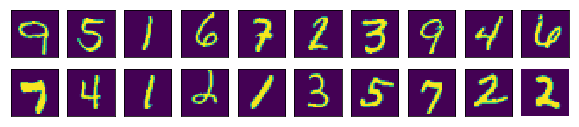

In [4]:
row_count = 2
column_count = 10

fig, ax = plt.subplots(row_count, column_count, figsize=(column_count, row_count))
plt.axis('off')

for x in range(row_count):
    for y in range(column_count):
        show_img(x_train_orig[np.random.randint(0, x_train_orig.shape[0] - 1)], ax[x, y])

plt.show()

## Pre-prcess data

In [5]:
img_rows = 28
img_cols = 28
num_classes = 10

In [6]:

# Add missing channel dimension
x_train = x_train_orig.reshape(x_train_orig.shape[0], img_rows, img_cols, 1)
x_test = x_test_orig.reshape(x_test_orig.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = keras.utils.to_categorical(y_train_orig, num_classes)
y_test = keras.utils.to_categorical(y_test_orig, num_classes)

In [7]:
mask_train = np.random.binomial(1, .05, y_train.shape[0]).astype('bool')
mask_test = np.random.binomial(1, .1, y_test.shape[0]).astype('bool')

x_train = x_train[mask_train]
x_test = x_test[mask_test]

y_train = y_train[mask_train]
y_test = y_test[mask_test]

## Define model

In [8]:
model = Sequential();
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

## Train model

In [10]:
batch_size = 32
epochs = 6

In [11]:
%%time
train_hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2975 samples, validate on 1012 samples
Epoch 1/6
2975/2975 [==============================] - 2s 753us/step - loss: 0.7410 - categorical_accuracy: 0.7748 - val_loss: 0.3283 - val_categorical_accuracy: 0.8972
Epoch 2/6
2975/2975 [==============================] - 1s 186us/step - loss: 0.2646 - categorical_accuracy: 0.9210 - val_loss: 0.2367 - val_categorical_accuracy: 0.9318
Epoch 3/6
2975/2975 [==============================] - 1s 181us/step - loss: 0.1515 - categorical_accuracy: 0.9563 - val_loss: 0.1672 - val_categorical_accuracy: 0.9457
Epoch 4/6
2975/2975 [==============================] - 1s 180us/step - loss: 0.0831 - categorical_accuracy: 0.9765 - val_loss: 0.1663 - val_categorical_accuracy: 0.9476
Epoch 5/6
2975/2975 [==============================] - 1s 178us/step - loss: 0.0483 - categorical_accuracy: 0.9899 - val_loss: 0.1907 - val_categorical_accuracy: 0.9437
Epoch 6/6
2975/2975 [==============================] - 1s 1

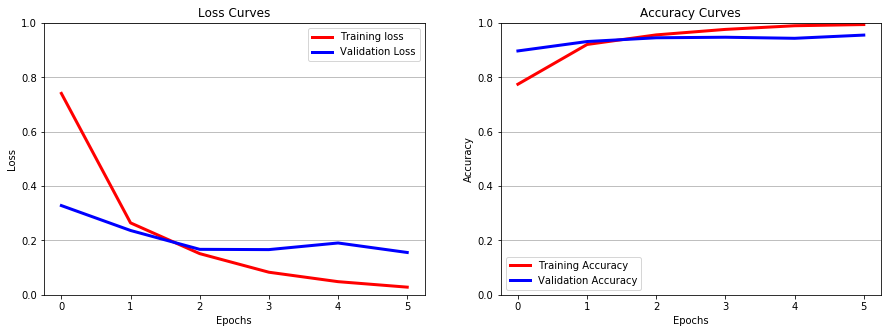

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Loss Curves
ax[0].plot(train_hist.history['loss'],'r',linewidth=3.0)
ax[0].plot(train_hist.history['val_loss'],'b',linewidth=3.0)
ax[0].grid(True, axis = 'y')
ax[0].legend(['Training loss', 'Validation Loss'])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curves')

# Accuracy Curves
ax[1].plot(train_hist.history['categorical_accuracy'],'r',linewidth=3.0)
ax[1].plot(train_hist.history['val_categorical_accuracy'],'b',linewidth=3.0)
ax[1].grid(True, axis = 'y')
ax[1].legend(['Training Accuracy', 'Validation Accuracy'])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curves')

plt.savefig('training-' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.png')

plt.show()

## Validate

In [13]:
y_test_pred = model.predict(x_test)

y_test_value = np.argmax(y_test, axis=1)
y_test_pred_value = np.argmax(y_test_pred, axis=1)

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


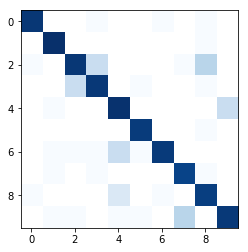

In [14]:
confusion_matrix = metrics.confusion_matrix(y_test_value, y_test_pred_value)
plt.imshow(np.log(confusion_matrix), cmap='Blues')
plt.show()

In [15]:
print('Accuracy:', metrics.accuracy_score(y_test_value, y_test_pred_value))
print('F1:', metrics.f1_score(y_test_value, y_test_pred_value, average='micro'))

Accuracy: 0.9555335968379447
F1: 0.9555335968379447
